# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzašším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **survived**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

# Homework num. 1

## 1.Importovani knihoven

In [2]:
#Nejprve si importuji knihovny, ktere zatim budu potrebovat k vypracovani ukolu.
import math
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## 2.Nahled na data a pochopeni jejich vzajemnych vztahu 

In [3]:
#Nactu si ze souboru data.csv informace do 'data_set' a zobrazim si par hodnot 
data_set = pd.read_csv("data.csv")
data_set.head()

#display(data_set.shape)
#display(data_set.head())
#display(data_set.info())
#display(data_set.describe())
#sdisplay(data_set.nunique())

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,"Wiltshire, England Niagara Falls, NY"
1,1,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,NaN
2,2,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,NaN
3,3,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,NaN
4,4,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"


In [4]:
data_set.describe()

,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.00000,1000.000000,802.000000,1000.000000,1000.00000,999.000000
mean,499.500000,0.39800,2.288000,29.850686,0.496000,0.40200,34.264352
std,288.819436,0.48973,0.840096,14.328743,1.024223,0.91719,53.315077
min,0.000000,0.00000,1.000000,0.166700,0.000000,0.00000,0.000000
25%,249.750000,0.00000,1.750000,21.000000,0.000000,0.00000,7.925000
50%,499.500000,0.00000,3.000000,28.000000,0.000000,0.00000,14.458300
75%,749.250000,1.00000,3.000000,39.000000,1.000000,0.00000,31.275000
max,999.000000,1.00000,3.000000,80.000000,8.000000,9.00000,512.329200


**Podivam se, jak jsou data reprezentovane, jejich cetnost a rozsah**

In [5]:
#Zobrazime si datove typy priznaku
display(data_set.dtypes)

#Zobrazime si kolik unikatnich hodnot najdeme v jednotlivych priznaku
display(data_set.nunique())


ID             int64
survived       int64
pclass         int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
home.dest     object
dtype: object

ID           1000
survived        2
pclass          3
name          999
sex             2
age            95
sibsp           7
parch           8
ticket        746
fare          254
cabin         157
embarked        3
home.dest     313
dtype: int64

Vidime, ze nektere priznaky jsou reprezentovany ciselne a nektere ne, to bude nasim ukolem vyresit. Dale se budeme muset zamerit na priznaky, u kterych nam hodnoty chybi, postup jak to budeme delat si uvedeme v nasledujicich casti kodu.

**Pro lepsi prehlednost v nasledujici praci si zobrazime vsechny priznaky, ktere jsou typu object a jejich pocet hodnot**

In [6]:
string_cols = data_set.select_dtypes(['object']).columns
print(string_cols)
data_set[string_cols].nunique()

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'home.dest'], dtype='object')


name         999
sex            2
ticket       746
cabin        157
embarked       3
home.dest    313
dtype: int64

**Zobrazime si nektere grafy, abychom lepe pochopili vztahy mezi daty.**

Vidime, ze pocet zemrelych je velmi vyssi nez pocet prezivsich.


survived    0    1
sex               
female    102  270
male      500  128


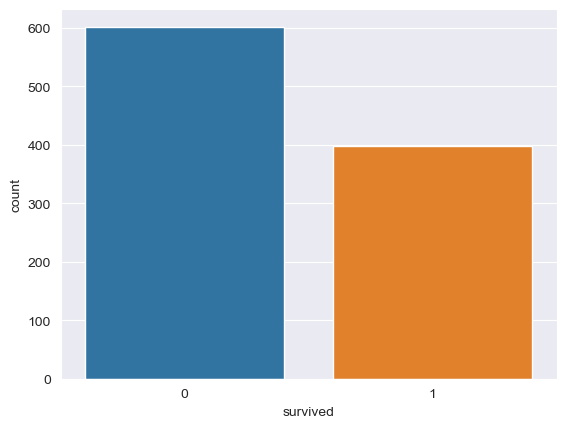

In [7]:
counts = data_set.groupby(['sex', 'survived']).size().unstack()
sns.countplot(x='survived',data=data_set)
print(counts)

Zrejme zeny maji mnohem vetsi sanci na preziti nez muzi.

survived    0    1
pclass            
1          89  161
2         117   95
3         396  142


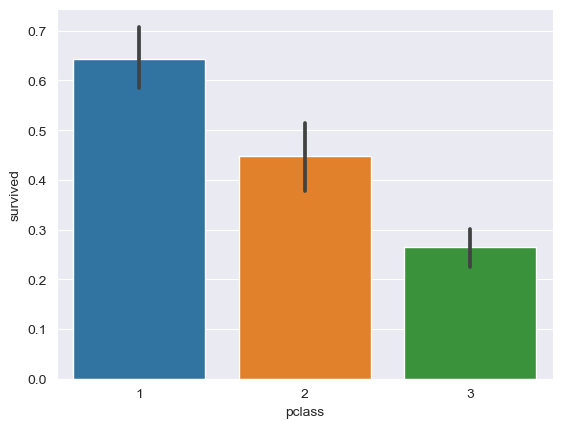

In [8]:
counts = data_set.groupby(['pclass', 'survived']).size().unstack()
sns.barplot(x='pclass', y = 'survived', data = data_set)
print(counts)

Pasazeri v prvni tride meli nejvetsi sanci prezit. Ve druhe tride trend pomalu pada a je o neco mensi sance,ze neprezijete. Ve treti tride uz je zrejme, ze sance na preziti je mnohem mensi. Coz je velmi zajimave, ale na druhou stranu jeste nic moc nerikajici, jak ostatni priznaky toto muzou ovlivnit, vytvorime si dalsi graf, kde si toto prohledneme vice do hloubky a vyvodit lepsi zavery.

C:\Users\altho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


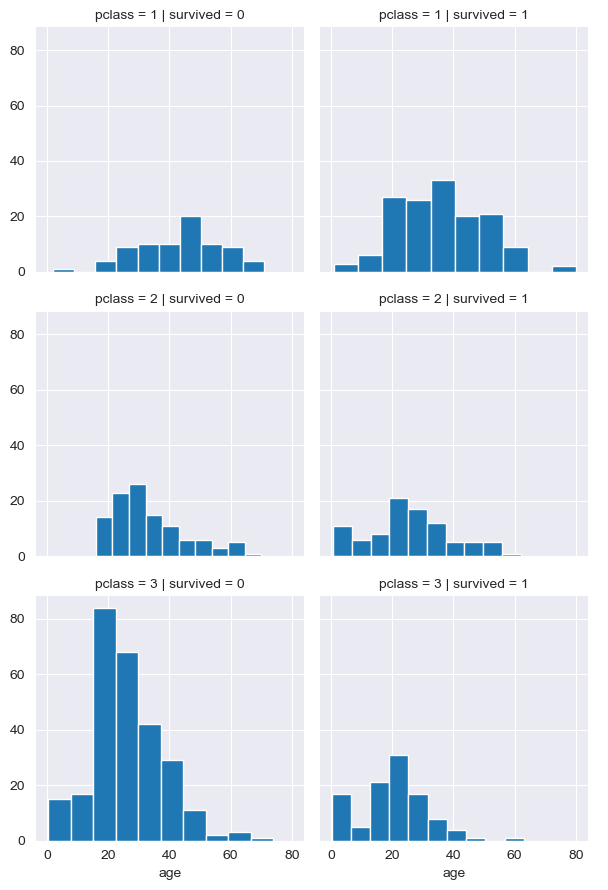

In [9]:
grid = sns.FacetGrid(data_set, col = 'survived', row = 'pclass')
grid.map(plt.hist,'age')
grid.add_legend()

Podivejme se jeste na priznak 'fare'.

C:\Users\altho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


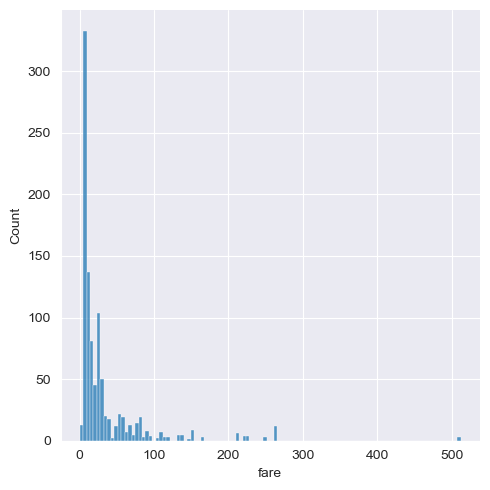

In [10]:
sns.displot(data_set.fare, kde=False)

Zde vidime, ze naprosta vetsina pasazeru zaplatila mene jako 100 za listek.

Prvni co vidime je, ze zde nektere priznaky jsou nominalni s velkym poctem hodnot ('name','ticket').
Proto si je mohu dovolit "dropnout", tim se nam nebude zatezovat vypocetni model a neprijdeme o dulezita data.
Nakonec jsem se rozhodl home.dest "dropovat", protoze mame pres lehce 50% hodnot a nas model to bude jen zatezovat.

In [11]:
data_set.drop('name',axis = 1,inplace = True)
data_set.drop('ticket',axis = 1,inplace = True)
data_set.drop('cabin',axis = 1,inplace = True)
data_set.drop('home.dest',axis = 1,inplace = True)

**Dale si zkontrolujeme,zda mame pro nejake priznaky chybejici hodnoty.** 
Jestli mame nejake chybejici hodnoty, budeme diskutovat jak tento problem vyresit.

In [12]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1000 non-null   int64  
 1   survived  1000 non-null   int64  
 2   pclass    1000 non-null   int64  
 3   sex       1000 non-null   object 
 4   age       802 non-null    float64
 5   sibsp     1000 non-null   int64  
 6   parch     1000 non-null   int64  
 7   fare      999 non-null    float64
 8   embarked  998 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 70.4+ KB


Nejprve vyresime chybejici hodnoty u priznaku 'age'. Nakonec jsem zvolil doplnit chybejici hodnoty medianem.
Na "stack overflow" jsem si nasel jak se dela median z vice priznaku. Rozhodl jsem se pouzit tuto metodu, protoze nam chybich 
mnoho hodnot a timto vyplnim hodnot co nejduverneji

In [13]:
median_age_by_category = data_set.groupby(['survived','sex','fare','embarked', 'pclass'])['age'].transform('median')
data_set['age'].fillna(median_age_by_category, inplace=True)


U priznaku 'fare' kde mame 1 chybejici hodnotu muzeme dodelat pomoci prumeru. Nakonec prevedu na datovy typ "int64"

In [14]:
get_avg = data_set['fare'].mean()
data_set.fillna(get_avg,inplace = True)
data_set['fare'] = data_set['fare'].astype(int)
data_set['age'] = data_set['age'].astype(int)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1000 non-null   int64 
 1   survived  1000 non-null   int64 
 2   pclass    1000 non-null   int64 
 3   sex       1000 non-null   object
 4   age       1000 non-null   int32 
 5   sibsp     1000 non-null   int64 
 6   parch     1000 non-null   int64 
 7   fare      1000 non-null   int32 
 8   embarked  1000 non-null   object
dtypes: int32(2), int64(5), object(2)
memory usage: 62.6+ KB


Ted nam chybi doresit priznaky 'embarked'. Jsou typu 'object' a u obou nemame vsechny hodnoty.


Kdyz mame data doplnena, tak se musime postarat o transformaci priznaku, 
ktere nejsou ciselneho typu, protoze jinak by jsme je dale nemohli pouzivat.


Jak transformujeme priznak 'sex', ktery ma pouze 2 ruzne hodnoty. Prevedeme hodnoty na binarni pomoci get_dummies, tedy female x male jako 0 1.
Vetsina algoritmu toto dokaze samo pro priklady jako Ano/Ne Male/Female Go/Stop. Tudiz transformaci resit nemusim.

Priznak 'embarked' jsem puvodne zamyslel jako nominalni, ale vlastne misto nalodeni muze hrat roli treba v dostupnosti kabin, ktere maji odlisny vysledek pri preziti. (Nastoupim pozdeji -> mene mista v lepsich kabinach -> lepsi kabiny = vetsi sance na preziti, takze by mohlo zalezet na poradi nastupu. Jak toto vyresit ? Inspiroval jsem se odstupnovanim kvality ve druhem cviceni a pomoci starsich  rad na stack overflow.  
Vytvoril jsem hodnoty podle poradi nastupu, nasel jsem si mapu trasy titanicu.

In [15]:
embarked_category = pd.api.types.CategoricalDtype(categories=['S', 'C', 'Q'], ordered=True)

Nastavim pro 'embarked' jako typ embarked_category.

In [16]:
data_set.embarked = data_set.embarked.astype(embarked_category)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        1000 non-null   int64   
 1   survived  1000 non-null   int64   
 2   pclass    1000 non-null   int64   
 3   sex       1000 non-null   object  
 4   age       1000 non-null   int32   
 5   sibsp     1000 non-null   int64   
 6   parch     1000 non-null   int64   
 7   fare      1000 non-null   int32   
 8   embarked  998 non-null    category
dtypes: category(1), int32(2), int64(5), object(1)
memory usage: 55.9+ KB


Pote nam chybi doplnit hodnoty pro priznak 'embarked', to snaze doplnim nejvice zastoupenou hodnotou, muzu si to dovolit, protoze pocet chybejicich hodnot neni tak velky a na vysledek to bude mit minimalni vliv.

In [17]:
most_appearence = data_set['embarked'].mode().values[0]
data_set['embarked'].fillna(most_appearence, inplace=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        1000 non-null   int64   
 1   survived  1000 non-null   int64   
 2   pclass    1000 non-null   int64   
 3   sex       1000 non-null   object  
 4   age       1000 non-null   int32   
 5   sibsp     1000 non-null   int64   
 6   parch     1000 non-null   int64   
 7   fare      1000 non-null   int32   
 8   embarked  1000 non-null   category
dtypes: category(1), int32(2), int64(5), object(1)
memory usage: 55.9+ KB


Ted prevedu jeste neciselne priznaky na cislene a mame pripravene data.

In [18]:
for col in data_set.select_dtypes('category').columns:
    data_set[col] = data_set[col].cat.codes

In [19]:
data_set = pd.get_dummies(data_set)

Pro priznak 'home.dest' toto delat nebudu, hodnot ruznych je 313 +1 o kterou jsem doplnil chybejici hodnotou 'missing'.Jednoduse je prevedu na ciselnou hodnotu.

In [20]:
data_set.info()
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          1000 non-null   int64
 1   survived    1000 non-null   int64
 2   pclass      1000 non-null   int64
 3   age         1000 non-null   int32
 4   sibsp       1000 non-null   int64
 5   parch       1000 non-null   int64
 6   fare        1000 non-null   int32
 7   embarked    1000 non-null   int8 
 8   sex_female  1000 non-null   bool 
 9   sex_male    1000 non-null   bool 
dtypes: bool(2), int32(2), int64(5), int8(1)
memory usage: 49.9 KB


,ID,survived,pclass,age,sibsp,parch,fare,embarked,sex_female,sex_male
0,0,0,3,11,5,2,46,0,False,True
1,1,0,3,25,0,0,7,0,False,True
2,2,0,3,4,3,2,27,0,False,True
3,3,1,3,34,1,0,15,2,True,False
4,4,1,3,18,0,0,7,1,True,False


## Rozdeleni dat na trenovaci, testovaci a validacni

Rozdelim si data na cilovou promennou co budu predikovat a na zbytek priznaku, ze kterych budu cilovou predikovat.


In [21]:
Xdata = data_set.drop("survived", axis = 1)
Ydata = data_set.survived

Dale si musime naimportovat knihovnu sklearn k rozdeleni dat a pevne si zvolime seed, je dulizte drzet seed konstanti i kdyz jsou data rozdelovana nahodne.

In [22]:
from sklearn.model_selection import train_test_split
random_seed = 77

Hodnota random_seed je vicemene jedno, ale musi zustat stejna pro stejne rozdeleni dat na opakovane rozdeleni dat.
Tudiz si volim hodnotu tak, aby jsme si ji dobre zapamatovali.

Pri rozdeleni dat (velikost podmnozin dat) jsem volil podle cviceni c.2. Nebyl jsem si zcela jist, jake rozdeleni mi prinese jake vysledky, samozrejme pozdeji vyzkousim vice zpusobu rozdeleni a uvidim optimanlni vysledek.

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, Ydata, test_size=0.2, random_state=random_seed) 

Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=random_seed) 

## Rozhodovaci strom 

Misto vlastni implementace stromu pouziji implementovany strom v knihovne sklearn balicek tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [25]:
clf = DecisionTreeClassifier(max_depth = 100)
clf.get_params()
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=100)

Podivame se na vysledky. Samozrejme, ze neocekavame velky uspech hned na zacatku, ale mit zakladni prehled je vzdy vyhodou.

In [26]:
import sklearn.metrics as metrics
print('accuracy score (train): {0:.3f}'.format(metrics.accuracy_score(ytrain, clf.predict(Xtrain))))
print('accuracy score (test): {0:.3f}'.format(metrics.accuracy_score(ytest, clf.predict(Xtest))))

accuracy score (train): 1.000
accuracy score (test): 0.720


Vidime, ze presnot na trenovacich datech je krasnych 100%. Bohuzel na testovacich uz tak neslavim, proto dale budeme ladit strom nez dojdeme k nejlepsimu vyslekdu.

**Ladeni stromu s hyperparametry.**

Zacneme s vyuzitim hyperparametru, vybral jsem si tyto parametry, protoze uz jsem je mohl vyzkouset drive na cviceni a jejich pouziti mi v tomto pripade pripada rozumne. Hodnoty parametru jsem nevedel jak nejlepe zvolit a zkousel jsem toho vice, nakonec pomoci stackoverflow a poctu pokuse jsem zvolil takto.

In [27]:
from sklearn.model_selection import ParameterGrid
param_grid = {
    'max_depth': range(1,10), 
    'min_samples_split': range (2,8),
    'min_samples_leaf': range (1,4),
    'criterion': ['entropy', 'gini']
}

In [28]:
param_comb = ParameterGrid(param_grid)
val_acc = []
train_acc = []
for params in param_comb:
    clf = DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split = params['min_samples_split'],
                                 min_samples_leaf = params['min_samples_leaf'],criterion=params['criterion'])
    clf.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, clf.predict(Xval)))

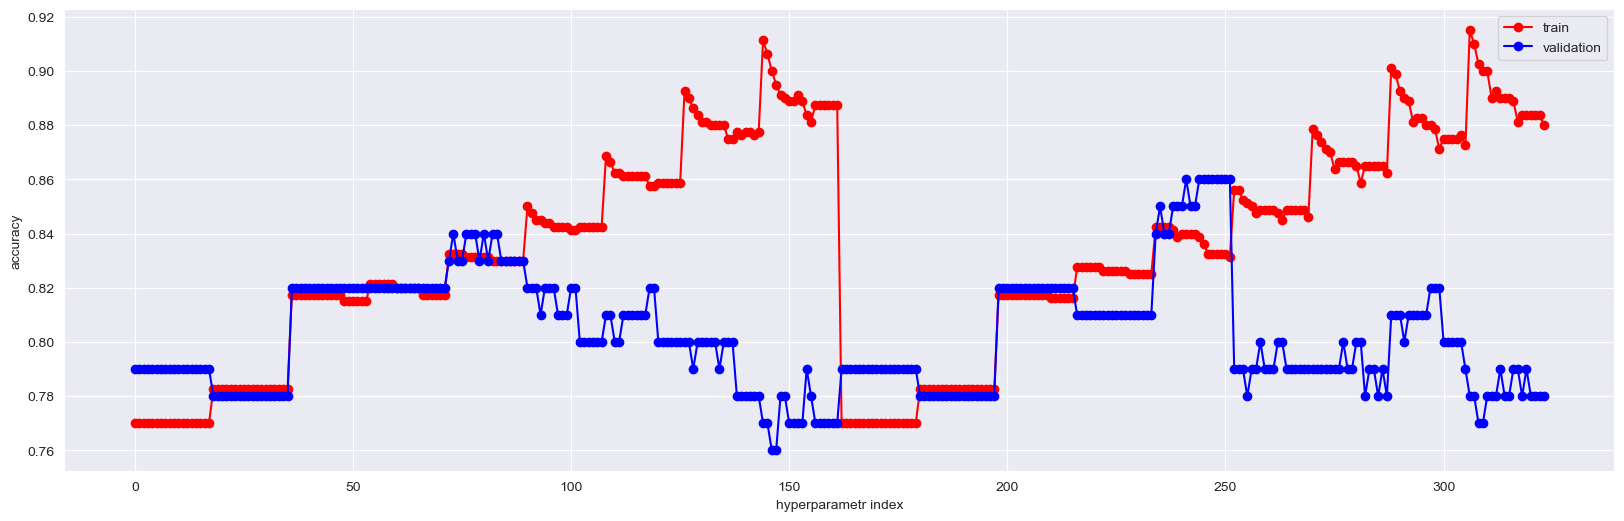

In [29]:
plt.figure(figsize=(20,6))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

**TOTO JE NAS FINALNI MODEL, POZDEJI POUZIJEME PRO EVALUACI**

In [30]:
best_params = param_comb[np.argmax(val_acc)]
best_params

{'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'gini'}

Z natrenovaneho modelu si ulozime nejlepsi kombinaci parametru a vyprnitime si vysledky.
Ocekavame presnost okolo 80% pro pozdejsi predikci na nasich evaluation datech.

Jeste si model natrenujeme na nejlpsich parametrch.

In [31]:
clf = DecisionTreeClassifier(**best_params) 
clf.fit(Xtrain, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clf.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, clf.predict(Xtest))))

accuracy score (train): 0.840000
accuracy score (validation): 0.850000
accuracy score (test): 0.770000


Vysledek 78% predikce pro testovaci data, to zatim neni zadna slava, uvidime jak dopadne metdoa nejblizsich sousedu.

**Po natrenovani rozhodovaciho stromu jeste udelame metodu nejblizsich sousedu**

In [32]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


Provedeme normalizaci dat pro nas KNN model.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)
Xtest_scaled = scaler.transform(Xtest)
knn = KNeighborsClassifier()
knn.fit(Xtrain_scaled, ytrain)
print(f"Validation accuracy of normalized model: {knn.score(Xval_scaled, yval):0.4f}")

Validation accuracy of normalized model: 0.7500


In [34]:
final_scores = []
val_acc = []
train_acc = []
param_grid = {'n_neighbors': range(3, 50),
              'weights': ["uniform", "distance"],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [2],
              'metric' : ['minkowski'],
              'n_jobs' : [None]
             }
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain_scaled, ytrain)

best_params = grid_search.best_params_
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(Xtrain_scaled, ytrain)
predictions = best_knn.predict(Xtest_scaled)

acc_test = accuracy_score(ytest, predictions, normalize=True)
acc_val = best_knn.score(Xval_scaled, yval)
acc_train = best_knn.score(Xtrain_scaled, ytrain)

print("Best Parameters:", best_params)
print("Test Accuracy:", acc_test)
print("Validation Accuracy:", acc_val)
print("Training Accuracy:", acc_train)



Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
Test Accuracy: 0.84
Validation Accuracy: 0.81
Training Accuracy: 1.0


## Vyhodnoceni 

Podivame jaky model nam vraci nejlepsi vysledky.

In [35]:
results = pd.DataFrame({'Model' : ['KNN','Decision_Tree'], 'Score': [acc_test,metrics.accuracy_score(ytest, clf.predict(Xtest))]}) 
results_data_set = results
results_data_set.head()

,Model,Score
0,KNN,0.84
1,Decision_Tree,0.77


Z vyhodnoceni modelu vidime , ze metoda KNN je lepsi pro nas porblem, i kdyz Decision Tree ma take dobre vysledky, tato metoda je lepsi pro datasety, protoze je  schopna modelovat nelineární vztahy mezi příznaky a cílovou proměnnou. Take neni nutna normalizace dat. Zaroven metoda KNN vyaduje mit cely dataset v pameti a to muze zatezovat cely proces a pro velke datasety se tato metoda v nektrych pripadech nevyplati, ale nam vydala lepsi vysledky.

**Vypocteme si F1 SCORE, AUC A ROC pro DecisionTree**

In [36]:
from sklearn.metrics import f1_score

In [37]:
ypredict = clf.predict(Xtest)

In [38]:
score = f1_score(ypredict,ytest)
print(score)

0.676056338028169


F1 neni uplne nejvyssi, ale pro nas pripade je dostacujici. Mensi F1 score znaci, ze presicion a recall hodnoty take nebudou nejvyssi.

Dale si spocteme AUC a ROC pro nas model. Budeme vychazet z toho co jsme se ucili na cviceni a pouzijeme to na nas model.

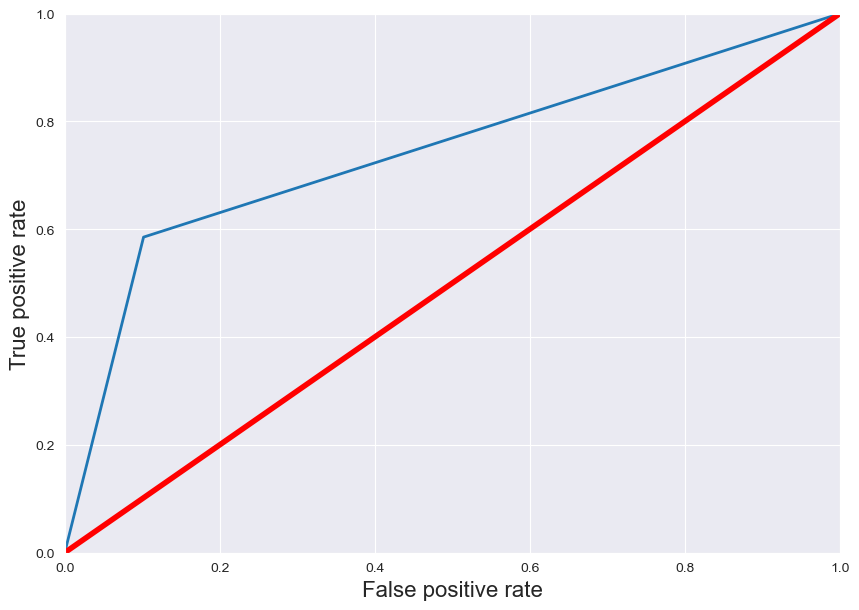

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypredict)
AUC = metrics.roc_auc_score(ytest, ypredict)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label = None, linewidth = 2)
plt.plot([0,1],[0,1],'r',linewidth = 4)
plt.axis([0,1,0,1])
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show()


Cervena cara ukazuje ciste nahodny model, modra cara by mela byt vzdy nad ni. Sice neni uplne vysoko nad ni, ale pro prvni provedeny model jsem rad,ze vysledek neni zas tak spatny.  Modra cara nam popisuje vysledek naseho nejlepsiho modelu.
Dale budeme pocitat AUC.

In [40]:
from sklearn.metrics import roc_auc_score

In [41]:
r_a_score = roc_auc_score(ytest,ypredict)
print(r_a_score)

0.7418354692021498


Vysledek AUC je velmi uspokojivy. Model ma solidni vykon a dokaze rozlisovat dobre pripady pro  false/positive pripady. Ale urcite je misto pro zlepseni.

**Vypocteme si F1 SCORE, AUC A ROC pro KNN**

Vypocitame si F1 skore pro nejlepsi KNN model.

In [42]:
ypredict_knn = best_knn.predict(Xtest_scaled)
score = f1_score(ytest, ypredict_knn, average='binary')
print(score)

0.7837837837837839


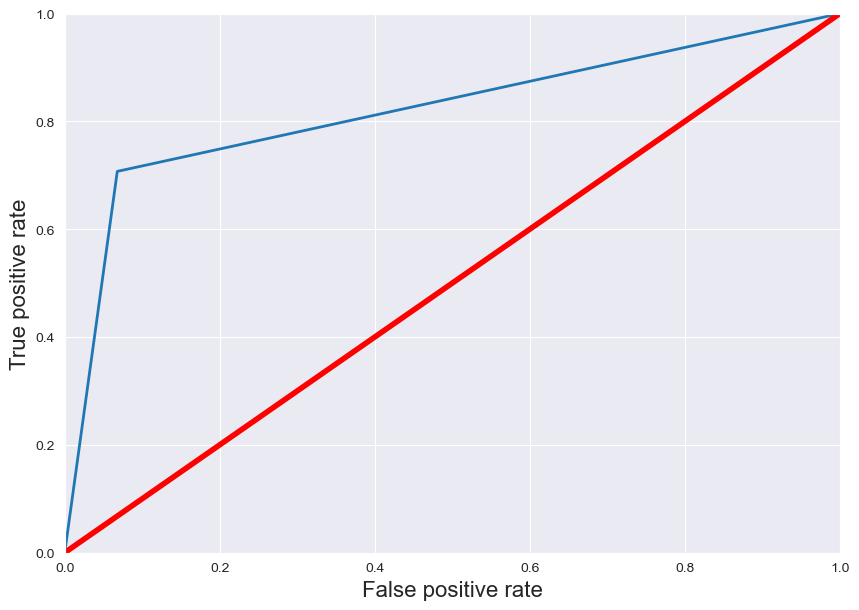

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypredict_knn)
AUC = metrics.roc_auc_score(ytest, ypredict_knn)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label = None, linewidth = 2)
plt.plot([0,1],[0,1],'r',linewidth = 4)
plt.axis([0,1,0,1])
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show()

In [44]:
r_a_score = roc_auc_score(ytest,ypredict_knn)
print(r_a_score)

0.81976023150062


## Evaulace

In [45]:
data_test = pd.read_csv("evaluation.csv")
data_test.head()

display(data_test.shape)
display(data_test.head())
display(data_test.info())
display(data_test.describe())
display(data_test.nunique())

(309, 12)

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C,NaN
1,1001,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,"New York, NY"
2,1002,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,"New York, NY"
3,1003,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,NaN
4,1004,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        244 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       309 non-null    float64
 9   cabin      62 non-null     object 
 10  embarked   309 non-null    object 
 11  home.dest  179 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB


None

,ID,pclass,age,sibsp,parch,fare
count,309.000000,309.000000,244.000000,309.000000,309.000000,309.000000
mean,1154.000000,2.317152,29.981216,0.508091,0.330097,30.163106
std,89.344838,0.831442,14.718045,1.097858,0.670167,46.312684
min,1000.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,1077.000000,2.000000,21.000000,0.000000,0.000000,7.879200
50%,1154.000000,3.000000,29.000000,0.000000,0.000000,13.500000
75%,1231.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1308.000000,3.000000,71.000000,8.000000,5.000000,512.329200


ID           309
pclass         3
name         309
sex            2
age           68
sibsp          7
parch          4
ticket       284
fare         151
cabin         55
embarked       3
home.dest    134
dtype: int64

**Musime opet udelat transformaci a prevedni na cisleny format pro nase pouziti.**

Pro upravu dat pouziji stejnou upravu jako pro nas data_set, aby testovani bylo co nejvice stejne.

In [46]:
data_test.drop('name',axis = 1,inplace = True)
data_test.drop('ticket',axis = 1,inplace = True)
data_test.drop('cabin',axis = 1,inplace = True)
data_test.drop('home.dest',axis = 1,inplace = True)


median_age_by_category = data_test.groupby(['sex','fare','embarked', 'pclass'])['age'].transform('median')
data_test['age'].fillna(median_age_by_category, inplace=True)

get_avg = data_test['fare'].mean()
data_test.fillna(get_avg,inplace = True)
data_test['fare'] = data_test['fare'].astype(int)
data_test['age'] = data_test['age'].astype(int)
data_test.info()


embarked_category = pd.api.types.CategoricalDtype(categories=['S', 'C', 'Q'], ordered=True)

data_test.embarked = data_test.embarked.astype(embarked_category)
data_test.info()

most_appearence = data_test['embarked'].mode().values[0]
data_test['embarked'].fillna(most_appearence, inplace=True)
data_test.info()

for col in data_test.select_dtypes('category').columns:
    data_test[col] = data_test[col].cat.codes

data_test = pd.get_dummies(data_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        309 non-null    int64 
 1   pclass    309 non-null    int64 
 2   sex       309 non-null    object
 3   age       309 non-null    int32 
 4   sibsp     309 non-null    int64 
 5   parch     309 non-null    int64 
 6   fare      309 non-null    int32 
 7   embarked  309 non-null    object
dtypes: int32(2), int64(4), object(2)
memory usage: 17.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        309 non-null    int64   
 1   pclass    309 non-null    int64   
 2   sex       309 non-null    object  
 3   age       309 non-null    int32   
 4   sibsp     309 non-null    int64   
 5   parch     309 non-null    int64   
 6   fare      309 non-null    

Pouzijeme nas natrenovany model s nejlepsimi parametry pro nase nova data.
Ocekavam presnost okolo 80%.

In [47]:
predictions = clf.predict(data_test)

In [48]:
ID = data_test['ID'].tolist()
results = pd.DataFrame({'ID': ID, 'Prediction': predictions})
results

,ID,Prediction
0,1000,0
1,1001,1
2,1002,1
3,1003,0
4,1004,1
...,...,...
304,1304,0
305,1305,0
306,1306,0
307,1307,1


In [49]:
results.to_csv('results.csv', index=False)

**Vysledek si nakonec ulozime do noveho csv fileu a budeme doufat, ze nas ukol dostane dobre ohodnoceni.**